In [1]:
import pandas as pd

path = './data/market-price.csv'
bitcoin_df = pd.read_csv(path,names=('day', 'price'))

bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [2]:
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])

In [3]:
bitcoin_df.tail()

,day,price
360,2018-08-22,6575.229167
361,2018-08-23,6434.881667
362,2018-08-24,6543.645714
363,2018-08-25,6719.429231
364,2018-08-26,6673.274167


In [4]:
bitcoin_df.set_index('day',drop=True,inplace=True)

In [5]:
bitcoin_df.head()

,price
day,
2017-08-27,4354.308333
2017-08-28,4391.673517
2017-08-29,4607.985450
2017-08-30,4594.987850
2017-08-31,4748.255000


<function matplotlib.pyplot.show(close=None, block=None)>

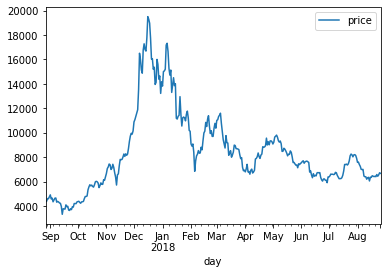

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

bitcoin_df.plot()
plt.show

In [7]:
!pip uninstall statsmodel
!pip install statsmodels==0.12.2

In [9]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(bitcoin_df.price.values, order=(3, 1, 3))
model_fit = model.fit(trend='C',full_output=True,disp=True)

In [10]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -2779.201
Method:                       css-mle   S.D. of innovations            500.312
Date:                Sun, 17 Oct 2021   AIC                           5574.402
Time:                        16:00:02   BIC                           5605.579
Sample:                             1   HQIC                          5586.794
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4146     27.641      0.232      0.816     -47.762      60.591
ar.L1.D.y     -0.2908      0.154     -1.889      0.059      -0.593       0.011
ar.L2.D.y     -0.6373      0.077     -8.279      0.000      -0.788      -0.486
ar.L3.D.y     -0.7094      0.148     -4.785      0.000      -1.000      -0.419
ma.L1.D.y      0.3949      0.140      2.813      0.005       0.120       0.670
ma.L2.D.y      0.6430      0.071      9.093      0.000       0.504       0.782
ma.L3.D.y      0.7423      0.131      5.660      0.000       0.485       0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.2306           -0.9918j            1.0183           -0.2136
AR.2            0.2306           +0.9918j            1.0183            0.2136
AR.3           -1.3594           -0.0000j            1.3594           -0.5000
MA.1            0.2051           -1.0067j            1.0274           -0.2180
MA.2            0.2051           +1.0067j            1.0274            0.2180
MA.3           -1.2764           -0.0000j            1.2764           -0.5000
-----------------------------------------------------------------------------
"""

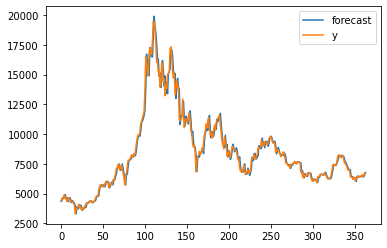

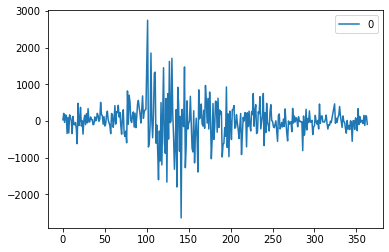

In [12]:
fig1 = model_fit.plot_predict()
fig2 = pd.DataFrame(model_fit.resid).plot()

In [14]:
pred_y,_,conf_int = model_fit.forecast(steps=5)
pred_y_lower =conf_int[:,0]
pred_y_upper =conf_int[:,1]
pred_y

array([6668.33859615, 6630.31400839, 6624.50142531, 6670.8435104 ,
       6704.96503818])

In [18]:
test_path = './data/market-price-test.csv'
test_df = pd.read_csv(test_path,names=['day','price'])
test_y = test_df['price'].to_numpy()
test_y

array([6719.26615385, 7000.04      , 7054.27642857, 6932.6625    ,
       6981.94615385])

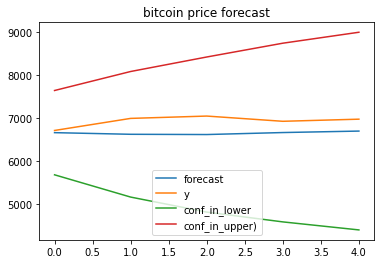

In [21]:
plt.plot(pred_y,label='forecast')
plt.plot(test_y,label='y')
plt.plot(pred_y_lower,label='conf_in_lower')
plt.plot(pred_y_upper,label='conf_in_upper)')
plt.title('bitcoin price forecast')
plt.legend()
plt.show()

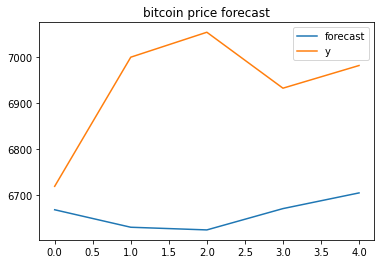

In [29]:
plt.plot(pred_y,label='forecast')
plt.plot(test_y,label='y')
plt.title('bitcoin price forecast')
plt.legend()
plt.show()

In [ ]:
!pip install fbprophet

In [ ]:
from fbprophet import Prophet

path ='./data/market-price.csv'
bitcoin_df =pd.read_csv(path,nemes=['ds','y'])
bitcoin_df.info()

prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                  changepoint_prior_scale=0.5)

prophet.fit(bitcoin_df)